# Manipulating Figure and Axes Objects

## Datasets and package imports

In [44]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

quakes = pd.read_csv('data/earthquakes.csv')



An easy way to create a `figure` object on a standalone basis is:

In [23]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [24]:
print(type(fig))

<class 'matplotlib.figure.Figure'>


This isn't terribly useful. You have a `figure` object, but it's just an empty shell without an `axes` object associated with it.   

An `axes` object can be added to a `figure` object:

<Axes: >

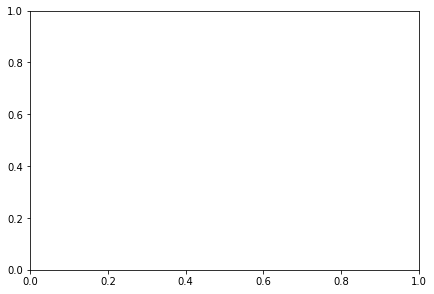

In [25]:
fig = plt.figure()
fig.add_axes([0.1, 0.1, 0.9, 0.9])

The arguments to `add_axes` passed, from `help(fig.add_axes)`:

`rect : tuple (left, bottom, width, height)
        The dimensions (left, bottom, width, height) of the new Axes. All
        quantities are in fractions of figure width and height.`
        
<span style="color: green;"> **Also, note that it's best to put all the code for a single visualization in a single code cell.</span>.**

In practice, creating an empty figure isn't the normal practice. It was done to highlight the distinction between the `figure` and `axes` objects. The most common way to start a plot is with this, rather unintuitive and inelegant command:

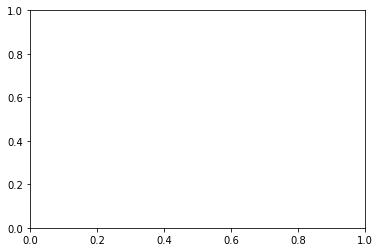

In [26]:
fig, axes = plt.subplots()

In [27]:
print(type(fig), '\n\n', type(axes))

<class 'matplotlib.figure.Figure'> 

 <class 'matplotlib.axes._subplots.AxesSubplot'>


When called with the default arguments; (nrows = 1, ncolumns = 1), `plt.subplots()` returns a tuple, with a `figure` object in the first position and an `axes` object in the second. Having each of these objects is useful as we can build plots out by taking advantage of each of their attributes and methods. 

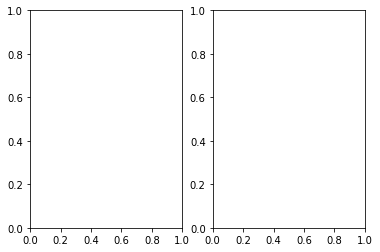

In [28]:
fig, axes = plt.subplots(1, 2)

In [29]:
print(type(fig), '\n\n', type(axes))

<class 'matplotlib.figure.Figure'> 

 <class 'numpy.ndarray'>


When `plot.subplots` is passed a number of rows and columns that will result in multiple subplots, it will return a numpy array of `axes` objects, each of which can be referenced, augmented and manipulated through subscripting. 

In [30]:
axes.shape

(2,)

In [31]:
axes[0], axes[1]

(<AxesSubplot: >, <AxesSubplot: >)

As an example, we leverage the `plot` method of each `axes` object below to plot Facebook's daily trade volume and closing price, respectively. 

Not also that we can manipulate the size of the figure by specifying the `figsize` argument with a tuple in inches of (width, height).

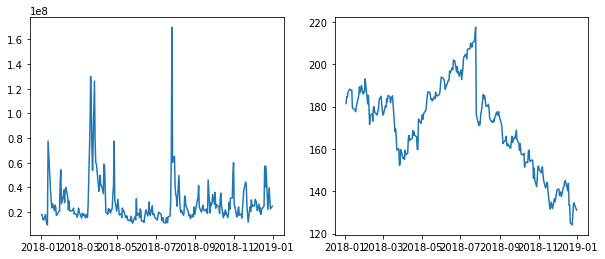

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(fb.volume)
axes[1].plot(fb.close)

## Pandas `plot()` 

Pandas `DataFrame` and `Series` objects have a `plot()` function that provides a convenient subset of Matplotlib's functionality. We won't fully explore Pandas' `plot()` functionality here, but one consideration when working with `plot()` is to make sure to capture the `axes` object returned by `plot()` to have the ability to continue to customize the plot to your needs. For example:

Text(0.5, 1.0, "Facebook's Open and High Pricing, Jan-2018 to Jan-2019")

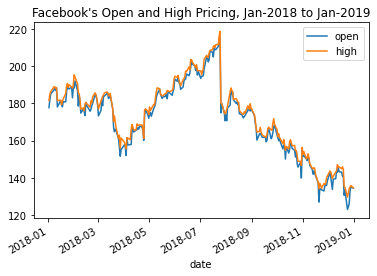

In [33]:
ax = fb.plot(kind='line', y = ['open', 'high'])
ax.set_title("Facebook's Open and High Pricing, Jan-2018 to Jan-2019")

In the example above, by capturing the `axes` object returned and stored in the `ax` variable, we have the ability to set the title after the `plot()` call is made. This is a little artificial, in that the Pandas `plot()` call takes `title` as an argument. Nevertheless, there are situations where `plot()` doesn't support some plotting options that Matplotlib provides or that it's easier to do with Matplotlib's base capabilities.

Unlike `plt.subplots()`, the Pandas `plot()` method only returns an `axes` object or a numpy array of them. It doesn't return a `figure` object. One practical example where one might need this is to save a plot as an image using `figure.savefig()`. To get the `figure` object associated with an `axes` object you can make use `ax.get_figure()`.

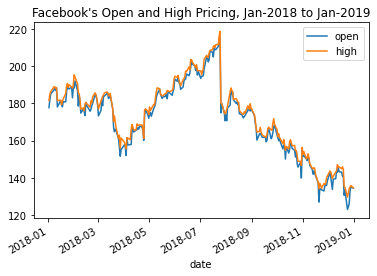

In [34]:
ax = fb.plot(kind='line', y = ['open', 'high'])
ax.set_title("Facebook's Open and High Pricing, Jan-2018 to Jan-2019")
fig = ax.get_figure()
fig.savefig('temp.jpg')

## Arranging Subplots

There are three ways to create and manipulate the layout of multiple subplots with `matplotlib`:
1. `fig.add_axes()`
2. `plt.subplots()` and `fig.add_subplot()`
3. `fig.add_subplot()` combined with `GridSpec`

Detailed examples are available at python-course.eu's [Creating Subplots in Matplotlib](https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php), but I'll attempt some simple examples of each approach here.


### Using `add_axes()`

`add_axes()` which we introduced earlier, allows us to use specify the exact size and placement of each `axes` object/plot. 

Text(0.5, 1.0, 'ax1 = Second Plot')

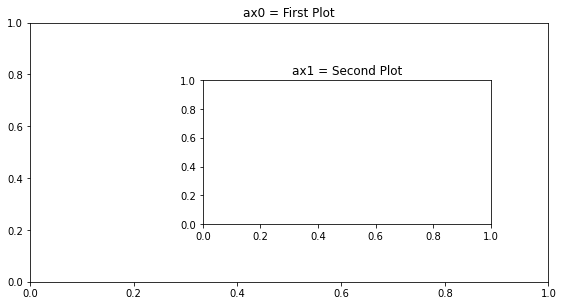

In [2]:
fig = plt.figure(figsize=(8, 4))
ax0 = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax0.set_title("ax0 = First Plot")
ax1 = fig.add_axes([0.4, 0.3, 0.5, 0.5])
ax1.set_title("ax1 = Second Plot")


You can even use `add_axes()` to place plots outside the `figure` object boundaries. 

Text(0.5, 1.0, 'ax1 = Second Plot')

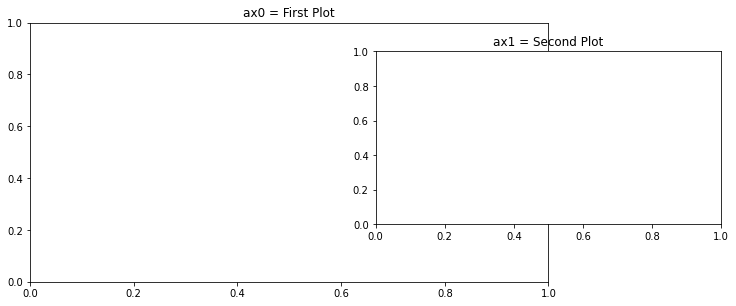

In [3]:
fig = plt.figure(figsize=(8, 4))
ax0 = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax0.set_title("ax0 = First Plot")
ax1 = fig.add_axes([0.7, 0.3, 0.6, 0.6])
ax1.set_title("ax1 = Second Plot")

### Using `plt.subplots()` and `fig.add_subplot()`

While `add_axes()` might be very useful when you require precise control, it might get tedious and unwieldy when creating and positioning a lot of subplots. If all you require is laying out plots over a partition of the `figure()` space into a fixed number of rows and columns, `plt.subplots()` and `fig.add_subplot()` might require A LOT less work than `add_axes()` to accomplish the same result. 

`plt.subplots()`, as we showed earlier, allows you to partition the `figure` space into equal-sized `axes`/plot objects. 

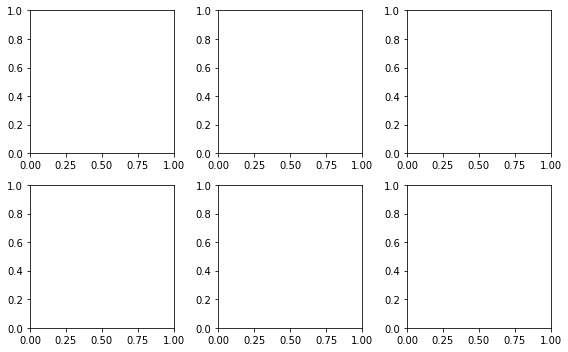

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
fig.tight_layout()

If you needed to add the subplots one at time (perhaps because they each need heavy customization), you can use `fig.add_subplot()`. `add_subplot()`, the way we'll use it, takes three arguments: 
- The number of equal-sized rows into which the `figure` space will partitioned.
- The number of columns
- Which plot number in that (nrows x ncols) space the axes object will be plotted into. The plot numbering starts with 1 and increases left to right across each row before increasing with successive rows. 

In the example below, we use `plt.subplot()` to add an `axes` object to what's effectively the upper left plot from the above example that was created with `plt.subplots(2, 3)`. In a 2 row x 3 column grid, it's positioned in the first position in that grid. 

Text(0.5, 0.5, 'subplot(2,3,1)')

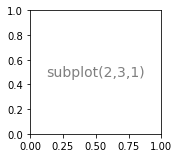

In [45]:
fig = plt.figure(figsize=(8,5))
sub1 = fig.add_subplot(2, 3, 1)
sub1.text(0.5, 0.5, 'subplot(2,3,1)', ha='center', va='center',
        size=14, alpha=.5)

We can add the 6th item to that grid, by adding a second `add_subplot()` call:

Text(0.5, 0.5, 'subplot(2,3,6)')

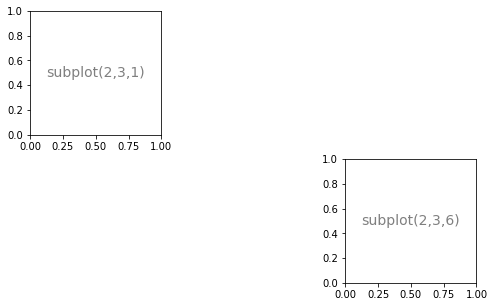

In [40]:
fig = plt.figure(figsize=(8,5))
fig.tight_layout()

sub1 = fig.add_subplot(2, 3, 1)
sub1.text(0.5, 0.5, 'subplot(2,3,1)', ha='center', va='center', size=14, alpha=.5)

sub2 = fig.add_subplot(236)
sub2.text(0.5, 0.5, 'subplot(2,3,6)', ha='center', va='center', size=14, alpha=.5)

Note that the second axes object created above was called with `add_subplot(236)` rather than `add_subplot(2, 3, 6)`. matplotlib accepts the parameters passed in either manner. 

Also note that there's no dependency between the partitioning of the `figure` space from one `add_subplot` call to another. In the example below, the first `axes` object/subplot is positioned _**as if the figure space was partioned into 2 rows and 1 column and the first `axes` object was placed in the first position in that partitioning of the space.**_ The second `axes` object/subplot is positioned as if the figure space was partitioned into 2 rows and 3 columns and then the `axes` object was placed in the 6th position in ***that*** partitioning of the space.   

The key point is: **Those two partitionings are completely independent of one another.** In fact, if you wanted to, matplotlib would let you plot them right over top of one another. 

Text(0.5, 0.5, 'subplot(2,3,6)')

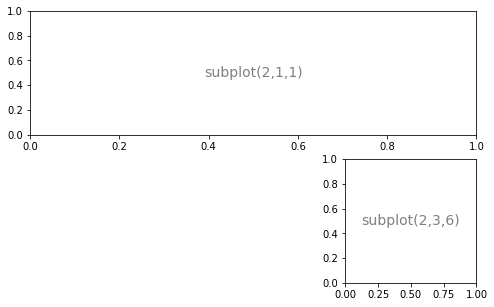

In [41]:
fig = plt.figure(figsize=(8,5))
fig.tight_layout()

sub1 = fig.add_subplot(2, 1, 1)
sub1.text(0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center', size=14, alpha=.5)

sub2 = fig.add_subplot(2,3, 6)
sub2.text(0.5, 0.5, 'subplot(2,3,6)', ha='center', va='center', size=14, alpha=.5)

### `add_subplot()` combined with `GridSpec`

Lastly, I think `Gridspec` has a more intuitive approach to partitioning the `figure` space and specifying the placement of the individual `axes` objects/plots. It requires importing the `Gridspec` module from matplotlib:

In [46]:
from matplotlib.gridspec import GridSpec

In [ ]:
A simple example uses `add_supbplot()` to add 6 `axes` objects in a 3 rows x 2 column arrangement. 

In [ ]:
fig = plt.figure(figsize=(10, 8))
nrows, ncols = 3, 2
for r in range(nrows):
    for c in range(ncols):
        fig.add_subplot(3, 2)

Add next:
- pandas.plot
- gridspec
- the other layout method
- mention figsize
- savefig


In [ ]:
dd

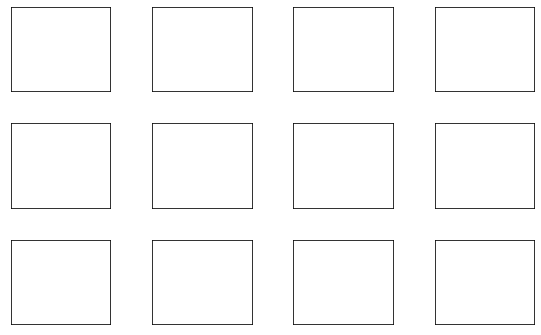

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(8, 5))
fig.tight_layout()

# iterate through each plot
for index, x in np.ndenumerate(axes):
    x.set_xticks([])
    x.set_yticks([])

In [43]:
for i, (index, x) in enumerate(np.ndenumerate(axes)):
    print(i, index, x)
    #    print(axes[index], x)

0 (0, 0) AxesSubplot(0.125,0.536818;0.227941x0.343182)
1 (0, 1) AxesSubplot(0.398529,0.536818;0.227941x0.343182)
2 (0, 2) AxesSubplot(0.672059,0.536818;0.227941x0.343182)
3 (1, 0) AxesSubplot(0.125,0.125;0.227941x0.343182)
4 (1, 1) AxesSubplot(0.398529,0.125;0.227941x0.343182)
5 (1, 2) AxesSubplot(0.672059,0.125;0.227941x0.343182)
